# Импорт библиотек

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps
from IPython import display
from sympy import * # чтобы ничего не решать во втором задании
# from scipy.stats import rayleigh Тоже есть, но сделаем вручную

# Построение распределений

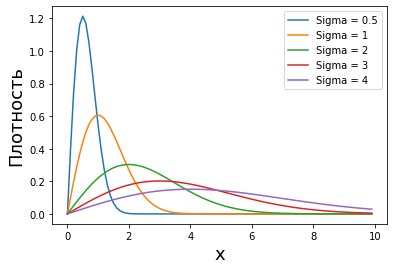

In [ ]:
class rayleigh_gen(sps.rv_continuous):
  def _pdf(self, x, sigma):
    return (x / (sigma**2)) * math.exp(-(x**2) / (2 * (sigma**2)))

rayleigh = rayleigh_gen(a = 0.001, b = 10, name = 'rayleigh')

def calculate_y(sigma):
  sample = []
  for x in np.arange(0, 10, 0.1):
    sample.append(rayleigh.pdf(x, sigma))
  return sample

plt.plot(np.arange(0, 10, 0.1), calculate_y(0.5), label='Sigma = 0.5')
plt.plot(np.arange(0, 10, 0.1), calculate_y(1), label='Sigma = 1')
plt.plot(np.arange(0, 10, 0.1), calculate_y(2), label='Sigma = 2')
plt.plot(np.arange(0, 10, 0.1), calculate_y(3), label='Sigma = 3')
plt.plot(np.arange(0, 10, 0.1), calculate_y(4), label='Sigma = 4')
plt.xlabel('x', fontsize = 18)
plt.ylabel('Плотность', fontsize = 18)
plt.legend()
plt.show()

# Построение графика на по функции

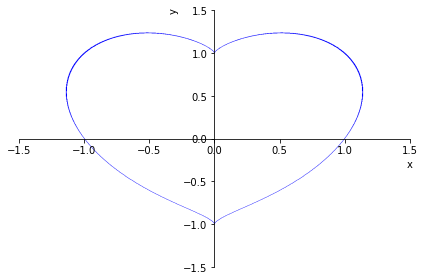

In [ ]:
# expr = (x**2 + y**2 - 1)**3 - (x**2) * (y**3) Если без заморочек
x, y = symbols('x y')
plot_implicit((x**2 + y**2 - 1)**3 - (x**2) * (y**3), (x, -1.5, 1.5), (y, -1.5, 1.5))

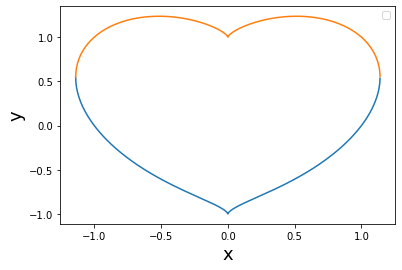

In [47]:
def heart_bottom(x):
  return 0.5 * np.abs(x)**(2/3) - (0.25 * np.abs(x)**(4/3) - x**2 + 1)**0.5

def heart_top(x):
  return 0.5 * np.abs(x)**(2/3) + (0.25 * np.abs(x)**(4/3) - x**2 + 1)**0.5

y_heart_bottom = []
y_heart_top = []
for x in np.arange(-1.139028, 1.139028, 0.001):
  y_heart_bottom.append(heart_bottom(x))
  y_heart_top.append(heart_top(x))

plt.plot(np.arange(-1.139028, 1.139028, 0.001), np.array(y_heart_bottom))
plt.plot(np.arange(-1.139028, 1.139028, 0.001), np.array(y_heart_top))
plt.xlabel('x', fontsize = 18)
plt.ylabel('y', fontsize = 18)
plt.legend()
plt.show()

# Анализ зависимостей

In [46]:
age = []
sex = []
bmi = []
children = []
smoker = []
region = []
charges = []

with open('./dataset_home.txt', mode = 'r') as file:
  for human in file.readlines():
    age.append(int(human.split(',')[0]))

    if human.split(',')[1] == 'male':
      sex.append(1)
    else:
      sex.append(0)

    bmi.append(float(human.split(',')[2]))

    children.append(int(human.split(',')[3]))

    if human.split(',')[4] == 'yes':
      smoker.append(1)
    else:
      smoker.append(0)

    if human.split(',')[5] == 'northwest':
      region.append(0)
    else:
      region.append(1)

    charges.append(float(human.split(',')[6]))

age = np.array(age)
sex = np.array(sex)
bmi = np.array(bmi)
children = np.array(children)
smoker = np.array(smoker)
region = np.array(region)
charges = np.array(charges)

Жители региона southeast тратят больше, чем жители региона northwest. На графике присутствуют выбросы и типовые значения

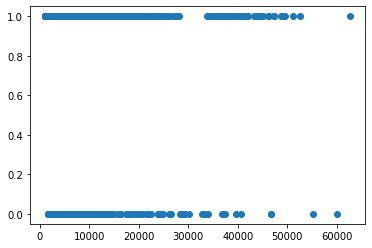

In [22]:
plt.scatter(charges, region)

Жители региона southeast имеют больший bmi, чем жители региона northwest. На графике присутствуют выбросы и типовые значения

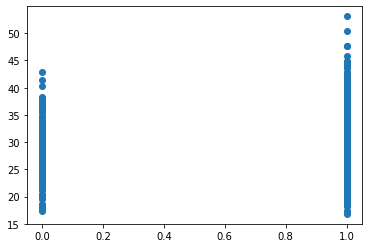

In [24]:
plt.scatter(region, bmi)

На графике не наблюдается зависимость индекса массы тела от возраста

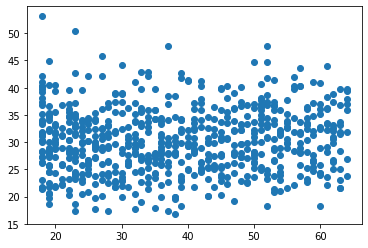

In [30]:
plt.scatter(age, bmi)

На графике возраста от количества затрат видны кластеры

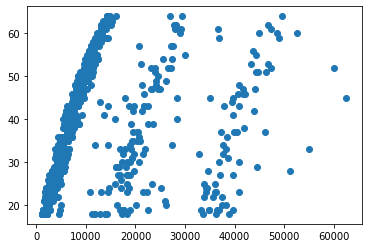

In [32]:
plt.scatter(charges, age)

На графике видно, что курящие мужчины тратят больше

<BarContainer object of 138 artists>

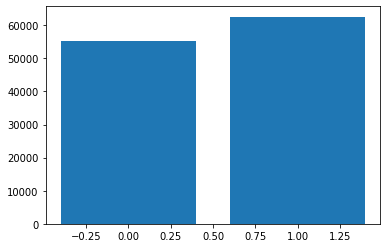

In [38]:
plt.bar(sex[smoker==1], charges[smoker==1])

График показывает, затраты работников женского пола

(array([120., 100.,  45.,  19.,  17.,   6.,  12.,  11.,   5.,   1.]),
 array([ 1621.8827  ,  6973.234639, 12324.586578, 17675.938517,
        23027.290456, 28378.642395, 33729.994334, 39081.346273,
        44432.698212, 49784.050151, 55135.40209 ]),
 <a list of 10 Patch objects>)

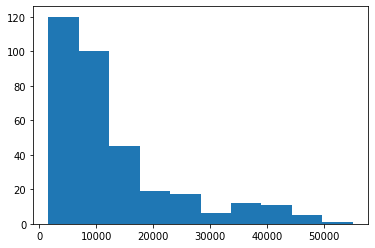

In [42]:
plt.hist(charges[sex==0])